<h1>Welcome to Data Visualization Wizard </h1>

In this part, we are going to use the data we organized to create several visuals. First, we are going to import the necessary libraries.

In [2]:
from matplotlib.ticker import MaxNLocator 
from parse_names import beautify_string
import matplotlib.pyplot as plt
import pandas as pd

<h3>Some Formatting</h3>

This cell block creates a function that prevents '0%' from being printed, providing a more simple and easy to understand appearance.
Also defines two lists which are necessary for other functions to work properly.

In [3]:
def my_autopct(pct):
        if pct > 0:
            return '{:.2f}%'.format(pct)
        else:
            return ''
        

region_list_tr = ["ic anadolu", "marmara", "akdeniz", "ege", "dogu anadolu", "guneydogu anadolu", "karadeniz"]
region_list_en = ["Central Anatolia", "Marmara", "Mediterranean", "Aegean", "Eastern Anatolia", "Southeastern Anatolia", "Black Sea"]


<h3>Plot Chart with Multiple Cities</h3>

This cell block creates a line chart. It can create the chart combining as many cities as the user wants. The user can write the "exit" keyword in order to stop and see the output. A sample output consisting of the cities "Malatya, Diyarbakır, Bartın, Mugla". Code can be executed to experiment with different variations.


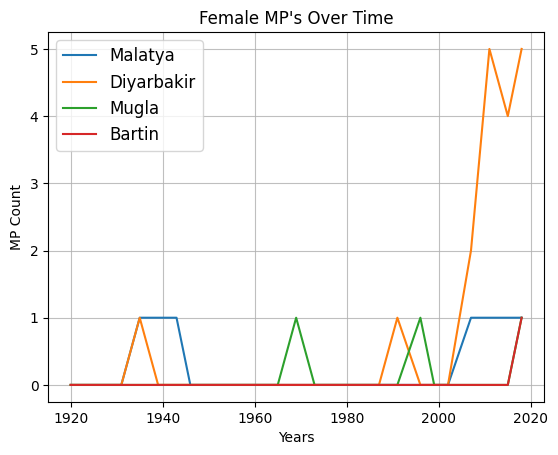

In [4]:
city_list = []
fig, ax = plt.subplots()
while True:
    user_input = input("Which city would you like to see about? ").strip()
    user_input = beautify_string(user_input)
    city_list.append(user_input.title())
    name = ""
    for i in user_input:
        if ord(i) in range(256):
            name += i
    user_input = name
    if user_input == "exit":
        break
    infile = "city info/formatted/" + user_input + ".csv"
    
    df = pd.read_csv(infile)
    ax.plot(df['Year'], df['Female MP Count'])
    ax.grid(alpha = 0.8)
    ax.yaxis.set_major_locator(MaxNLocator(integer=True))

if len(city_list) != 0:    
    plt.title("Female MP's Over Time")
    plt.xlabel("Years")
    plt.ylabel("MP Count")
    plt.legend(city_list, loc = 'upper left', fontsize = 12)
    plt.show()
else:
    print("You have not given any cities.")

<h3>Stacked Bar Chart</h3> 

This cell block creates a stacked bar chart. It can create the chart for only one city and returns a chart that shows the numbers of male and female MP's for all the terms. The user can write "exit" keyword in order to stop and see the output. An example output for "Balıkesir" is shown below.

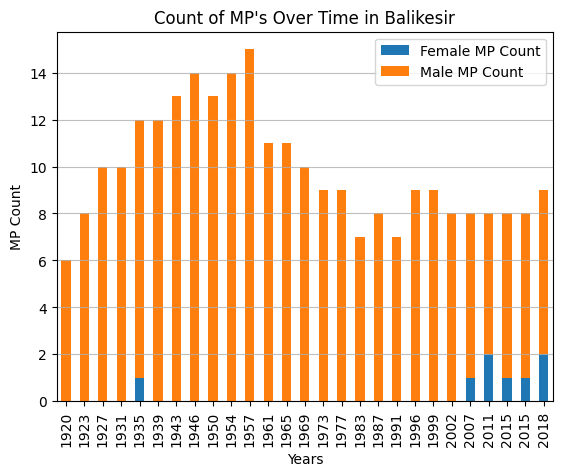

In [22]:
while True:
    user_input = input("Which city would you like to see about? ").strip()
    user_input = beautify_string(user_input)
    name = ""
    for i in user_input:
        if ord(i) in range(256):
            name += i
    user_input = name
    if user_input == "exit":
        break
    infile = "city info/formatted/" + user_input + ".csv"
    
    try:
        df = pd.read_csv(infile)
        ax = df.plot.bar(x='Year', y = ['Female MP Count', 'Male MP Count'], stacked=True, title='Count of MP\'s Over Time in {}'.format(user_input.title()))
        break
    except:
        print("Invalid city name. Please check your input format.")

ax.grid(axis='y', alpha = 0.8)
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
plt.xlabel("Years")
plt.ylabel("MP Count")
plt.show()

<h3>Single City Pie Chart</h3>

This cell block creates a pie chart. It can create the chart for only one city and only one term. Returns a chart that shows the distribution of male and female MP's for the assembly with the given number. 

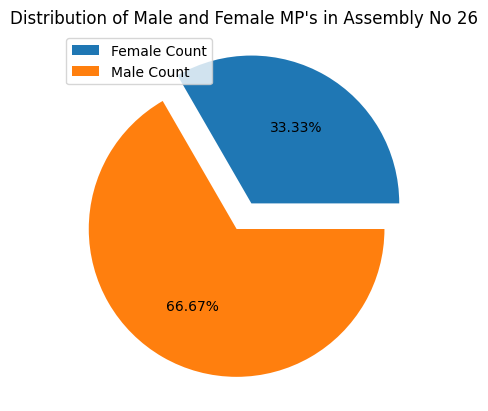

In [28]:
city_list = []
fig, ax = plt.subplots()
while True:
    user_input = input("Which city would you like to see about? ").lower().strip() 
    city_list.append(user_input)
    user_input = beautify_string(user_input)
    name = ""
    for i in user_input:
        if ord(i) in range(256):
            name += i
    user_input = name
    if user_input == "exit":
        break
    infile = "city info/formatted/" + user_input + ".csv"
    query = int(input("Which assembly would you like to learn about? "))
    try:
        df = pd.read_csv(infile)
        ax = df.iloc[query-1]
        break
    except:
        print("Invalid city name. Please check your input format.")
Female = ax['Female MP Count']
Male = ax['Male MP Count']
plt.pie([Female, Male], autopct=my_autopct,explode = (0.1, 0.1))
plt.title("Distribution of Male and Female MP's in Assembly No {}".format(query))
plt.legend(["Female Count", "Male Count"])
plt.show()

<h3>Region Pie Chart</h3>

This cell also creates a pie chart that shows the distribution of female MP's covering all the regions for a term determined by the user input. It demonstrates the percentage of participation from each region. Code can be rerun to create new charts with different terms.

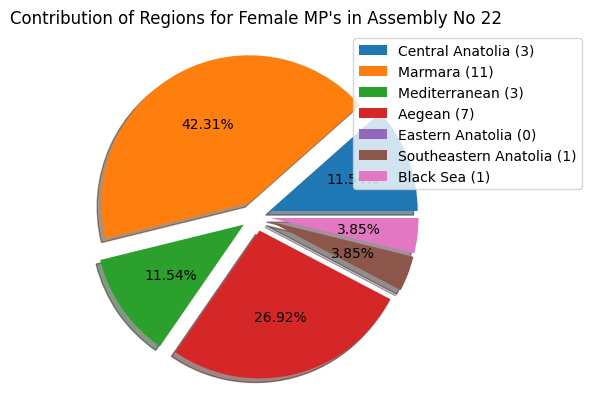

In [6]:
term = int(input("Please type in the term you want to search for: "))
mp_count_list = []
legend_list = region_list_en.copy()
for idx, region in enumerate(region_list_tr):
    infile = "city info/formatted/" + region + ".csv"
    df = pd.read_csv(infile)
    mp_count = df.loc[term - 1]["Female MP Count"]
    mp_count_list.append(mp_count)
    
    legend_list[idx] += " ({})".format(mp_count)

plt.pie(mp_count_list, autopct=my_autopct, shadow = True, explode=(0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1))
plt.title("Contribution of Regions for Female MP's in Assembly No {}".format(term))
plt.legend(legend_list, bbox_to_anchor = (1.4, 1), loc = "upper right", fontsize = 10)
plt.show()

<h3>Plot Chart for Each Region</h3>

This plot charts demonstrates the change in number of female MP's over time. It shows how each term, number of female MP's changed and allows comparison between them. 

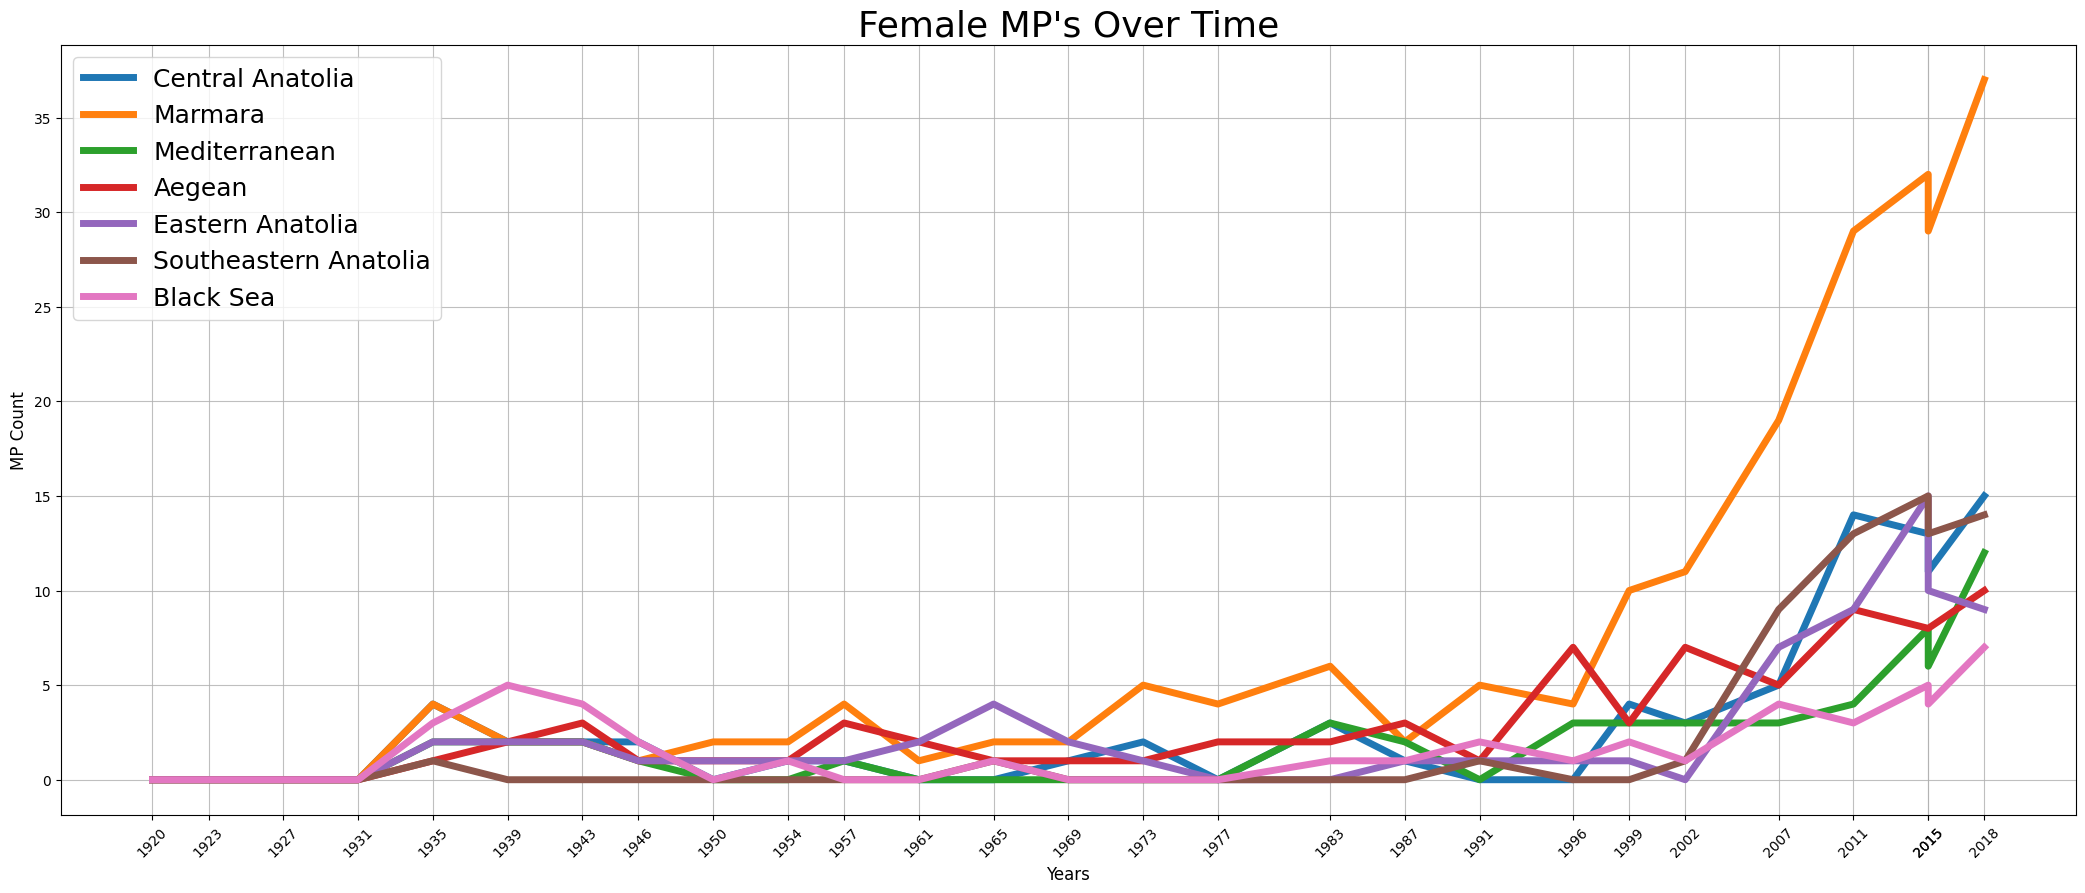

In [19]:
fig, ax = plt.subplots(figsize  = (26,10))
for region in region_list_tr:
    infile = "city info/formatted/" + region + ".csv"
    df = pd.read_csv(infile)
    ax.plot(df['Year'], df['Female MP Count'], linewidth = 5)
    ax.set_xticks(df["Year"])
    ax.grid(alpha = 0.8)

legend_list = [i.title() for i in region_list_en]
plt.title("Female MP's Over Time", fontsize = 26)
plt.xlabel("Years", fontsize = 12)
plt.ylabel("MP Count", fontsize = 12)
plt.xticks(rotation=45)  
plt.legend(legend_list, loc = 'upper left', fontsize = 18)
plt.show()


<h3>Region Pie Chart</h3>

This chart takes a region name as an input and displays it's total female and male MP's ratio in a pie chart. Both the percentages and the number of representatives are shown on the chart. 

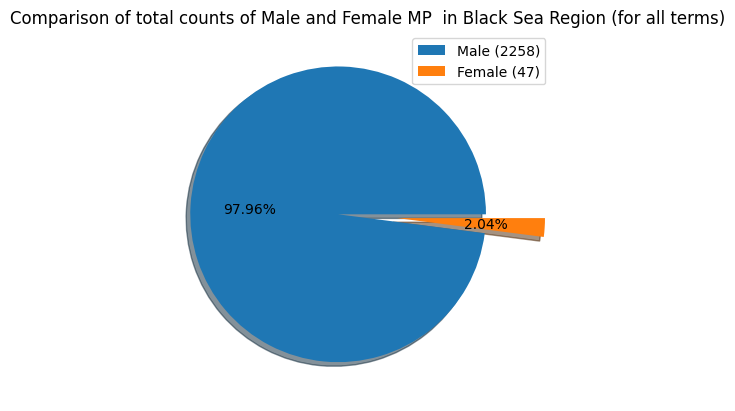

In [29]:
region = beautify_string(input("Please enter the region (in Turkish): "))
idx = region_list_tr.index(region)
infile = "city info/formatted/" + region + ".csv"

df = pd.read_csv(infile)
total_female = int(df["Female MP Count"].sum())
total_male = int(df["Male MP Count"].sum())
data = ["Male ({})".format(total_male), "Female ({})".format(total_female)]
plt.pie([total_male, total_female], autopct=my_autopct, shadow = True, explode=(0.1, 0.1))
plt.title("Comparison of total counts of Male and Female MP  in {} Region (for all terms)".format(region_list_en[idx].title()))
plt.legend(data, loc = "upper right")
plt.show()

<h3>Total Number of Female MP's in all terms.</h3>

This chart shows the distribution of total number of male and female members of parliament in all terms. Chart shows that in all terms, only 4.79% of representatives were female. 

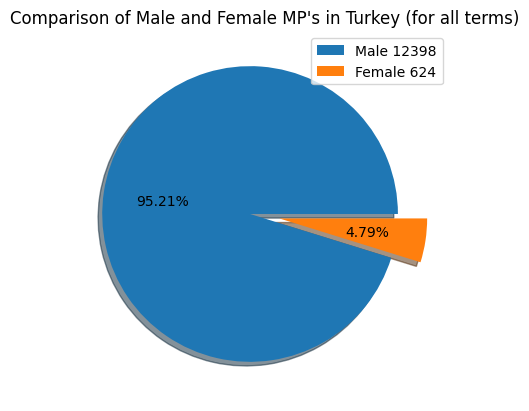

In [10]:
infile = "city info/formatted/turkiye.csv"
df = pd.read_csv(infile)
female_count = df["Female MP Count"].sum()   
male_count = df["Male MP Count"].sum()   
data = [male_count, female_count]
plt.title("Comparison of Male and Female MP's in Turkey (for all terms)")
plt.pie(data, autopct=my_autopct, shadow = True, explode=(0.1, 0.1))
plt.legend(["Male {}".format(male_count), "Female {}".format(female_count)])
plt.show()

